#<center><font size = 12>Chicago Crime  Exploratory Data Analysis</font></center>

![alt text](https://www.economist.com/img/b/1280/720/85/sites/default/files/images/2018/05/articles/main/20180505_usp506.jpg)

In [44]:
import pandas as pd 
import numpy as np 
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import pickle 
import bokeh as bh 
import folium
from folium import plugins
import matplotlib.image as mpimg
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime

In [45]:
crimes = pd.read_pickle('cleaned_ChicagoCrimes.pkl')
crimes.head(5)

Date            Primary Type            Description  \
60332 2019-01-03 19:20:00  PUBLIC PEACE VIOLATION        OTHER VIOLATION   
62258 2019-03-16 17:58:00                 BATTERY                 SIMPLE   
62600 2019-03-12 22:00:00                   THEFT         $500 AND UNDER   
62633 2019-03-14 18:42:00                 BATTERY                 SIMPLE   
62634 2019-03-14 16:03:00           OTHER OFFENSE  OTHER VEHICLE OFFENSE   

                Location Description  Arrest  Domestic  District FBI Code  \
60332                       AIRCRAFT       0         0      16.0       26   
62258                         STREET       0         0       1.0      08B   
62600  RESIDENTIAL YARD (FRONT/BACK)       0         0       2.0       06   
62633                      RESIDENCE       0         0      24.0      08B   
62634                         STREET       0         1       2.0       26   

       X Coordinate  Y Coordinate  Year   Latitude  Longitude  \
60332     1100374.0     1943906.0  2019  42.002816 -87.906094   
62258     1174723.0     1900866.0  2019  41.883369 -87.633860   
62600     1182276.0     1879784.0  2019  41.825347 -87.606781   
62633     1163827.0     1949311.0  2019  42.016542 -87.672499   
62634     1182227.0     1879766.0  2019  41.825299 -87.606961   

                            Location  Month  Day  Hour  Day Of Week  
60332   (42.002816387, -87.90609433)      1    3    19            3  
62258   (41.88336939, -87.633860272)      3   16    17            5  
62600  (41.825346902, -87.606780575)      3   12    22            1  
62633  (42.016541612, -87.672499325)      3   14    18            3  
62634    (41.825298645, -87.6069609)      3   14    16            3

# Questions 
 * Top 5 primary types in chicago and their pattern early wise
 * Most probabale places for the respective crimes
 * Which crimes received more arrests
 * Top 5 most crimes that occured in the domestic
 * Yearly monthly trend of crimes 
 * How the crimes  







# Top 10 crimes in chicago 

In [3]:
# funtion for creating barplot
colors=['red','blue','green','orange','cyan']
def barplot(data,title,xlabel,ylabel):
  sns.set()
  data.plot(kind='bar',color=colors, figsize=(10,8))
  plt.title(title, fontsize='20',color='blue')
  plt.xlabel(xlabel, fontsize= '17', color = 'r')
  plt.ylabel(ylabel, fontsize= '17', color = 'r')
  plt.annotate


# What are most occurring Crimes in Chicago


THEFT                  1379465
BATTERY                1193643
CRIMINAL DAMAGE         744457
NARCOTICS               668482
ASSAULT                 410320
OTHER OFFENSE           406448
BURGLARY                372638
MOTOR VEHICLE THEFT     295042
DECEPTIVE PRACTICE      257083
ROBBERY                 246087
Name: Primary Type, dtype: int64


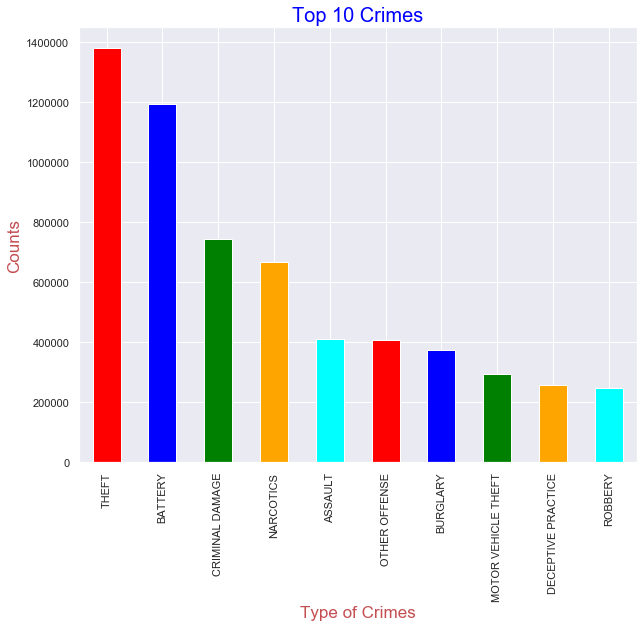

In [48]:
# Chicago crimes count by primary type 
crimes_primarytype = crimes['Primary Type'].value_counts().head(10)
crimes_primarytype
plt.subplots(figsize=(8,8))
barplot(crimes_primarytype,'Top 10 Crimes','Type of Crimes','Counts')
print(crimes_primarytype)


## Observation From the Primary Type

* From the reported crimes we see Theft cases are more reported in the greater chicago  area followed by Battery and Criminal Damage,Narcotics,Assault.

    * THEFT : 1356765
    * BATTERY : 1169770
    * CRIMINAL DAMAGE : 729277
    * NARCOTICS : 652702
    * ASSAULT  : 402285
* Finally,THEFT and BATTERY are most Happening crimes in chicago



# Which is the most described Description 

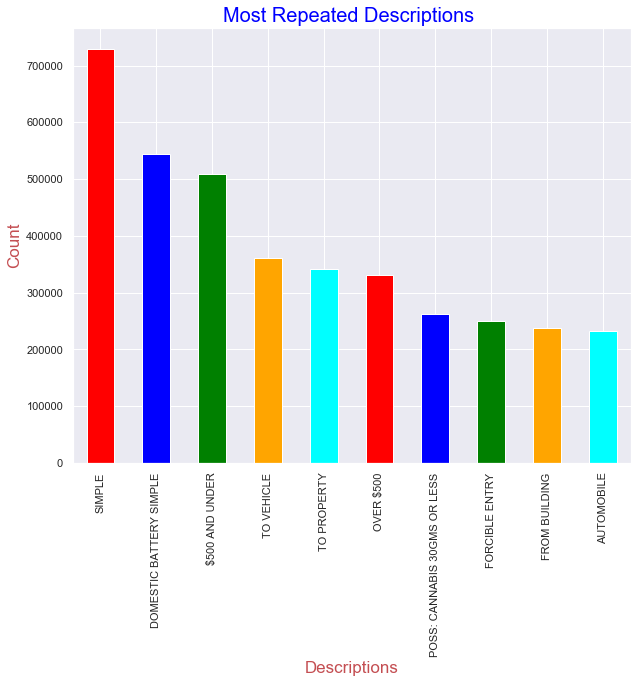

In [5]:
count_Description = crimes['Description'].value_counts().head(10)
barplot(count_Description,'Most Repeated Descriptions ','Descriptions','Count')

# Observation 
* Most of the crimes were described as simple and some of them are related to vehicle and property and some of them with Fine.
* Most of the crimes where not involved with human Injury 

# Locations


# Which locations are greatly involved in crime

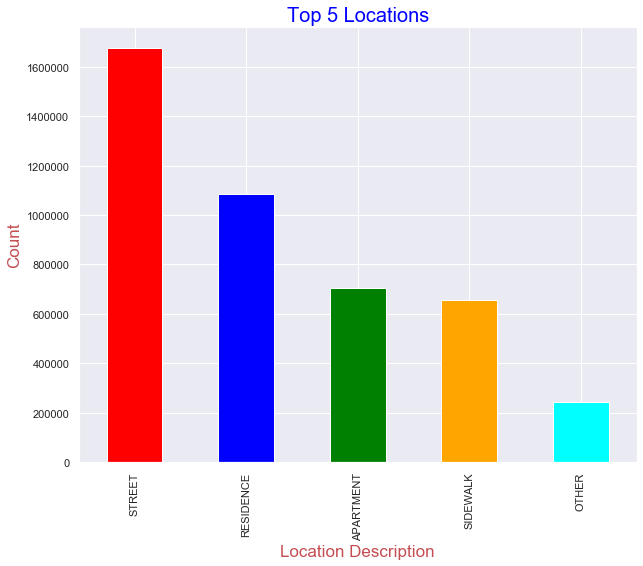

In [6]:
crimes_LocationDescription = crimes['Location Description'].value_counts().head(5)
barplot(crimes_LocationDescription,'Top 5 Locations','Location Description','Count')


# Observations From location Description
* Top 5 dangerous locations to occur crime.
* Streets are the most dangerous places for possibility of crime rather then residence and appartments.
* Crimes count is almost equal at both Apartments and sidewalks.

# comparision of Arrest vs Non arrest


In [7]:
crimes_arrest = crimes['Arrest'].value_counts()
crimes_arrest

0    4731606
1    1782851
Name: Arrest, dtype: int64

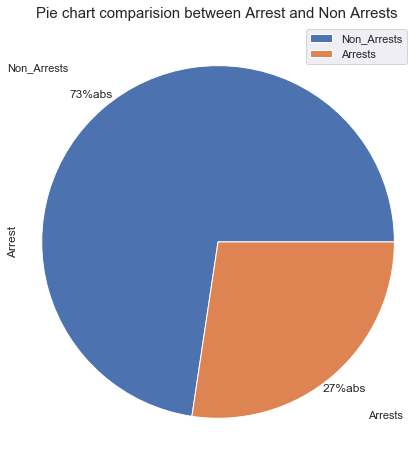

In [8]:
labels = ['Non_Arrests','Arrests']
crimes_arrest.plot.pie(figsize = (7,8), autopct = '%1.0f%%abs', pctdistance = 1.1, labeldistance = 1.3, labels = labels)
plt.legend(loc='upper right')
plt.title('Pie chart comparision between Arrest and Non Arrests',fontsize=15)
plt.axis('equal')
plt.show()

SyntaxError: invalid syntax (<ipython-input-54-6f524f629e16>, line 1)

# Observation from the ARRESTS columns
* 73 % of the crimes ended with the Non Arrest
* Only 27 percents of the crimes have Arrests

# Domestic column

In [9]:
crimes_Domestic  = crimes.Domestic.value_counts()
crimes_Domestic

0    5640294
1     874163
Name: Domestic, dtype: int64

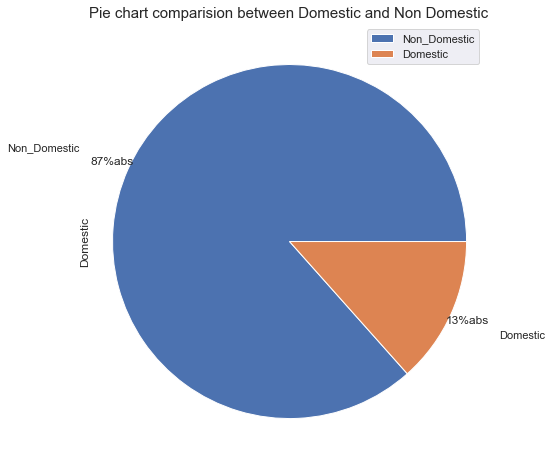

In [10]:
labels = ['Non_Domestic','Domestic']
crimes_Domestic.plot.pie(figsize = (7,8), autopct = '%1.0f%%abs', pctdistance = 1.1, labeldistance = 1.3, labels = labels)
plt.legend(loc='upper right')
plt.title('Pie chart comparision between Domestic and Non Domestic',fontsize=15)
plt.axis('equal')
plt.show()

# Observations 
* Most of the crimes occured in the Non domestic Region , 87 percent of the crimes occurred in the Non Domestic areas


# Primary_Type Comparision with Arrests

In [11]:
crimes_primary_nonarrests = crimes.groupby(['Arrest'])['Primary Type'].value_counts()[0].head(10)
crimes_primary_arrests = crimes.groupby(['Arrest'])['Primary Type'].value_counts()[1].head(10)
crimes_primary_arrests


Primary Type
NARCOTICS             664627
BATTERY               272044
THEFT                 160845
CRIMINAL TRESPASS     135410
ASSAULT                93794
OTHER OFFENSE          73515
PROSTITUTION           62207
WEAPONS VIOLATION      57571
CRIMINAL DAMAGE        51735
DECEPTIVE PRACTICE     40022
Name: Primary Type, dtype: int64

Text(0, 0.5, 'Number of Arrests')

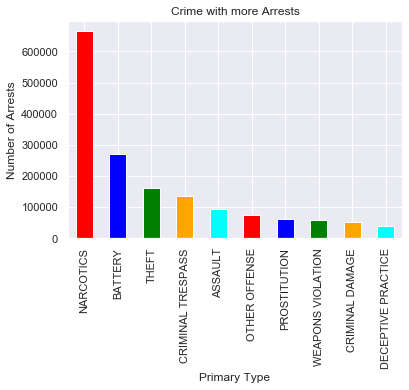

In [12]:
crimes_primary_arrests.plot(kind='bar',color=colors)
plt.title('Crime with more Arrests')
plt.xlabel('Primary Type')
plt.ylabel('Number of Arrests')


# Observations
* Most of the arrests are linked with Narcotics
* In the above chart we see thefts are most happened crimes in the Chicago 
* From the chart "crimes with more arrest" Number of Arrests for Theft cases are about 156944 but the total number of cases where 1356765 
* coming to the Narcotics almost all the case related to Narcotics were reported as Arrested


# Primary type comparision with Domestic and Non Domestic

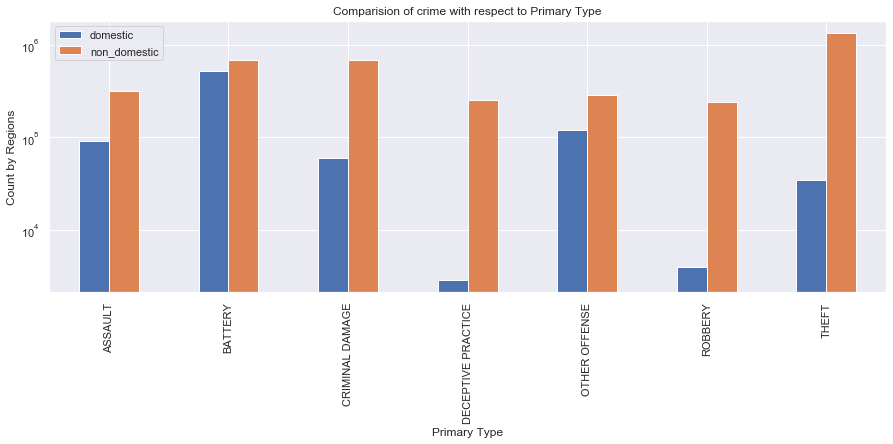

In [13]:

crimes_primary_Domestic = crimes.groupby(['Domestic'])['Primary Type'].value_counts(dropna=True)[1].head(10)
crimes_primary_Non_Domestic = crimes.groupby(['Domestic'])['Primary Type'].value_counts(dropna=True)[0].head(10)
crimes_Domestic_bar = pd.DataFrame({'domestic':crimes_primary_Domestic,'non_domestic':crimes_primary_Non_Domestic})
crimes_Domestic_bar.dropna(inplace=True)
crimes_Domestic_bar.plot(kind='bar',figsize = (15,5))
plt.title('Comparision of crime with respect to Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('Count by Regions')
plt.yscale('log')


# Observations
* Almost all the Thefts where happened in the Non Domestic regions
*  Domestic regions faces more BATTERY type crimes
* Battery Type crimes is available in both the regions
* crimes like DECEPTIVE PRACTICE and ROBBERY's are very low in Domestic Regions 



In [14]:
crimes_Domestic_bar.dropna()

domestic  non_domestic
ASSAULT              90694.0      319626.0
BATTERY             517025.0      676618.0
CRIMINAL DAMAGE      59041.0      685416.0
DECEPTIVE PRACTICE    2854.0      254229.0
OTHER OFFENSE       120167.0      286281.0
ROBBERY               3899.0      242188.0
THEFT                34263.0     1345202.0

# Heat map of crime Narcotics based on Districts

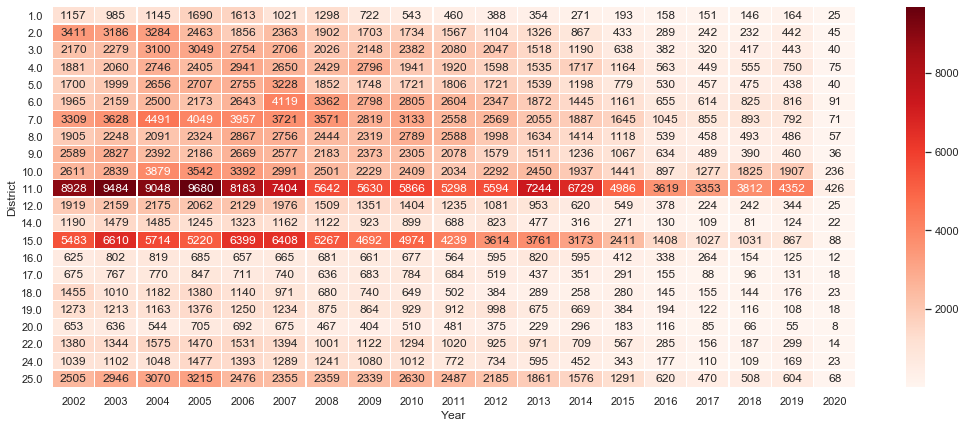

In [57]:
narcotics = crimes.loc[crimes['Primary Type']=='NARCOTICS']
corr = narcotics.groupby(['District','Year']).count().Arrest.unstack().dropna()
fix, ax = plt.subplots(figsize=(18,7))
sns.set(font_scale=1.0)
sns.heatmap(corr,linewidths=0.2,annot=True,fmt='g',cmap='Reds')

* district 11 shows more number of arrests  over the year, ofcourse there is a down trend
* District 15 follows the same trend with the district 11


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023156E667C8>,
      dtype=object)

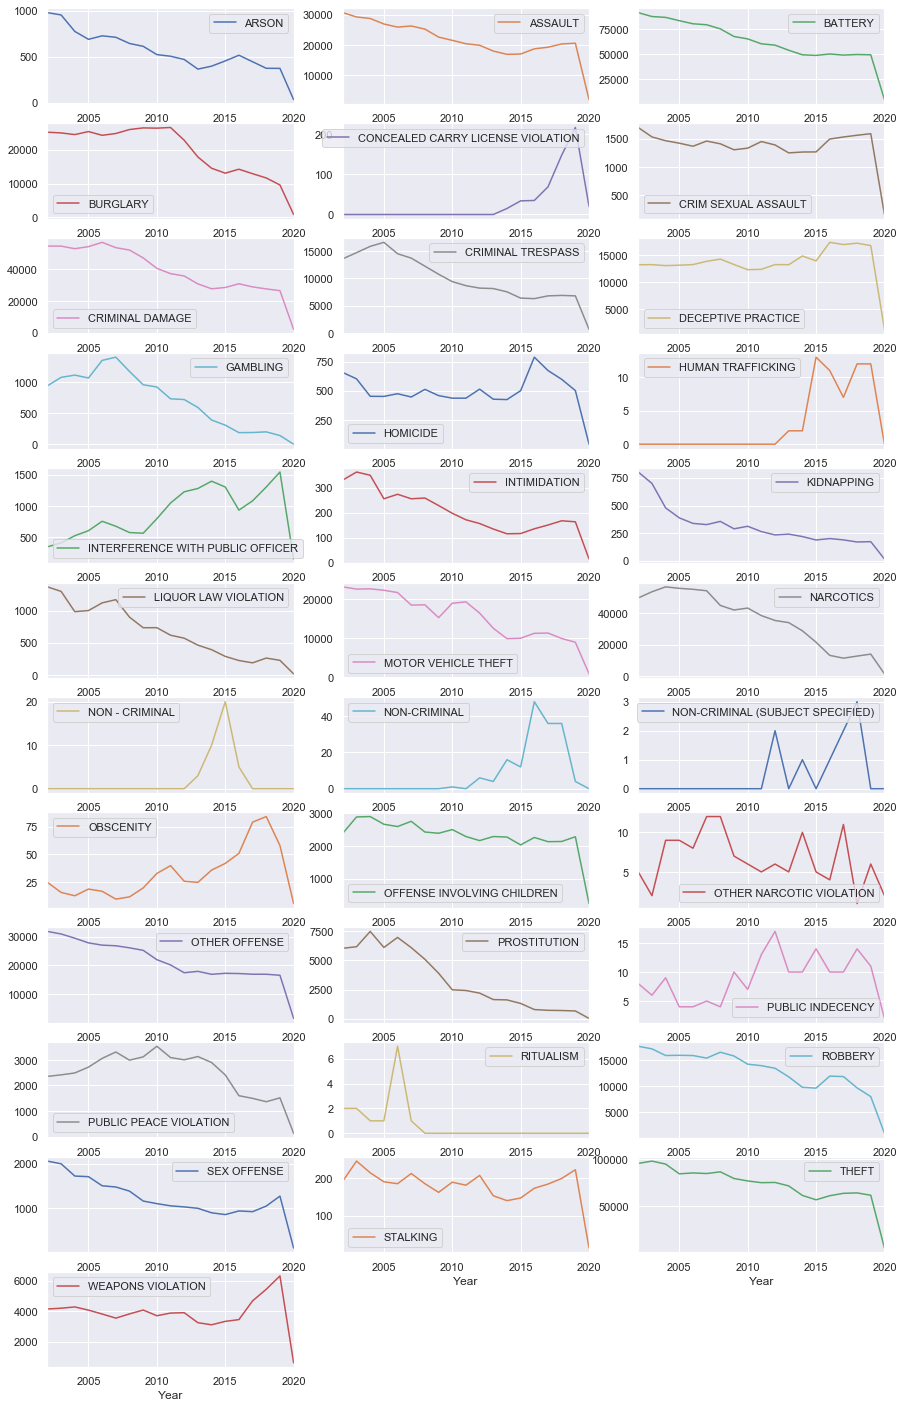

In [16]:
a = crimes.groupby(['Year','Primary Type'])['Year'].count().unstack().fillna(0)
a.plot(figsize=(15,25),layout=(-1,3),subplots=True,sharex=False,sharey=False)

* Weapon Violation shows increasing over the years
* Stalking and Sex offence shows downward trend in between the years
* Buglary,Kidnapping,vehicle Theft crimes reducing over the years

# How is the activity of CRIME  w.r.t Domestic Areas

Text(0.5, 1.0, 'Comparision of crimes at Domestic and Non Domestic places')

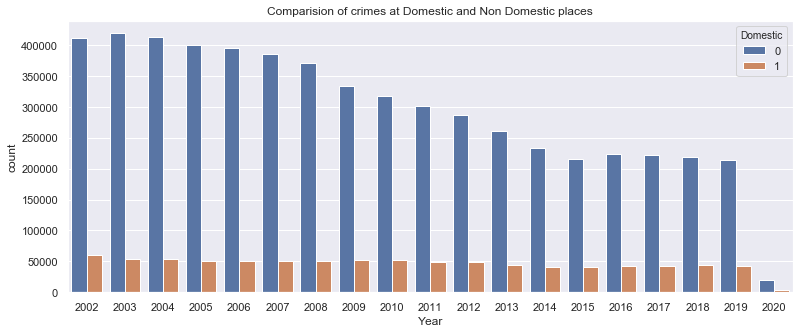

In [17]:
plt.figure(figsize=(13,5))
sns.countplot(x ='Year',hue='Domestic', data = crimes[['Year','Domestic']])
plt.title('Comparision of crimes at Domestic and Non Domestic places')

* Over all, Almost most Number of crimes are happening in the Non Domestic areas 


# Comparision of arrest and Non arrest  of Crimes

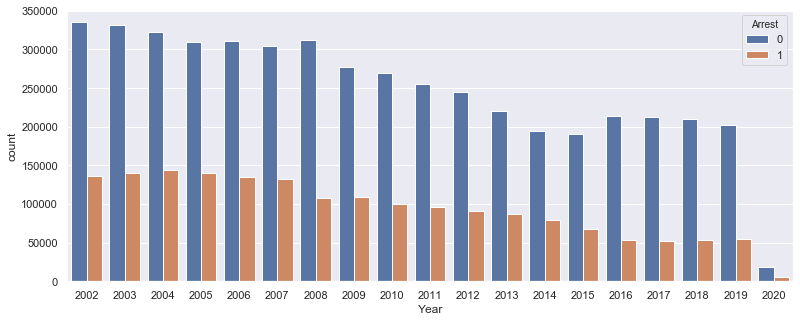

In [18]:
plt.figure(figsize=(13,5))
sns.countplot(x='Year',hue='Arrest',data=crimes[['Year','Arrest']].reset_index())

* The Arrest and the Non Arrests are directly proportional to each other.
* All the time,There are 50 percent of unsolved cases. From the 2015 the number of unsolved cases keep on increasing.

# Which month has more Arrest's and Non Arrest's

In [ ]:
# comparison of arrest and non arrests months 
months = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x= 'Month',hue='Arrest',data=crimes)
ax.set_xticklabels(months)

* Most Non arrests are reported in the month of July
* Most Number of Arrests were reported in the month of May.
* Number of Arrests from may to oct are same , where for end of the yease show decreasing.same with Non arrests

# Spread of all Crimes in the Chicago Area






In [20]:
def generateBaseMap(default_location=[41.8781,-87.6298], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map



In [70]:
basemap = generateBaseMap()
basemap

In [100]:
# heat map
from folium.plugins import HeatMap
base_map = generateBaseMap()
c = input('Enter the year for the Heatmap :')
crimes_2019 =  crimes.loc[crimes.Year==int(c)]
HeatMap(data=crimes_2019[['Latitude', 'Longitude', 'Arrest']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map

Enter the year for the Heatmap : 2019


In [23]:
so = crimes[crimes['Primary Type']=='HOMICIDE']
so.head(1)

Date Primary Type          Description  \
64245 2019-05-27 23:42:00     HOMICIDE  FIRST DEGREE MURDER   

      Location Description  Arrest  Domestic  District FBI Code  X Coordinate  \
64245          PARKING LOT       1         0       8.0      01A     1145925.0   

       Y Coordinate  Year  Latitude  Longitude                       Location  \
64245     1847569.0  2019  41.73771 -87.740958  (41.737709752, -87.740958098)   

       Month  Day  Hour  Day Of Week  
64245      5   27    23            0

Text(0.5, 1.0, 'HOMICIDES by Locations')

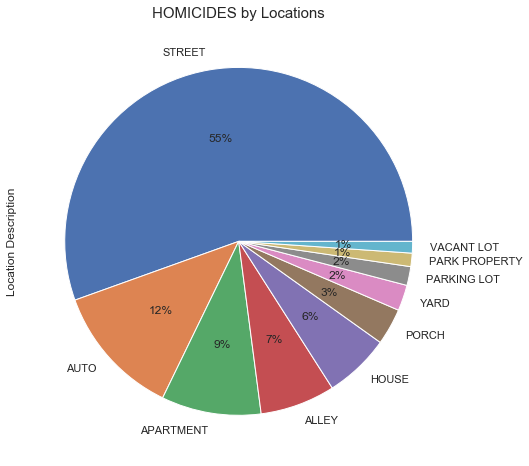

In [73]:
so['Location Description'].value_counts().head(10).plot.pie(figsize = (10,8), autopct = '%1.0f%%', labeldistance = 1.1)
plt.title('HOMICIDES by Locations',fontsize=15)

FIRST DEGREE MURDER         9369
RECKLESS HOMICIDE             48
INVOLUNTARY MANSLAUGHTER       3
SECOND DEGREE MURDER           1
Name: Description, dtype: int64

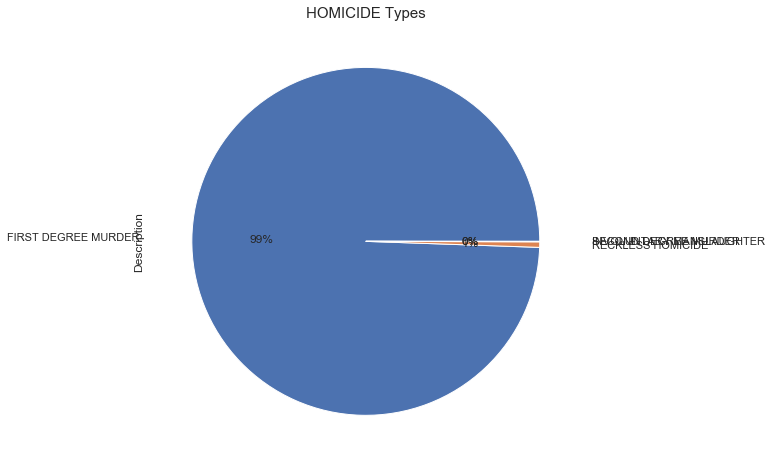

In [76]:
so['Description'].value_counts().head(10).plot.pie(figsize = (10,8), autopct = '%1.0f%%', labeldistance = 1.3)
plt.title('HOMICIDE Types',fontsize=15)
so['Description'].value_counts().head(10)

* 56 percent of the Murders were happening in the Streets, 10 percent of cases are in AUTO and Appartments
* All the crimes are reported as FIRST DEGREE MURDER's.It involves any intentional murder that is willful and premeditated with malice aforethought. Premeditation requires that the defendant planned the murder before it was committed or was “lying in wait” for the victim.
* 99 percent homicide involved with First Degree Murder

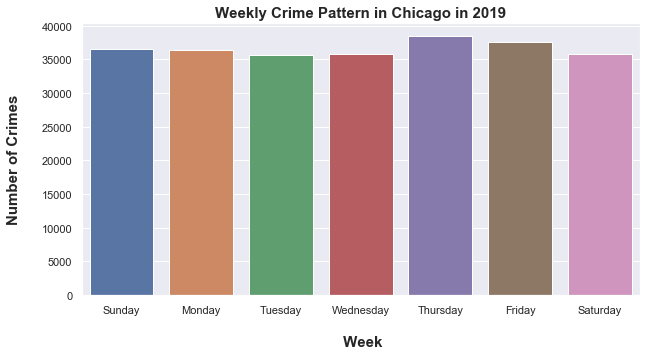

In [93]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Day Of Week', data=crimes_2019)
plt.title("Weekly Crime Pattern in Chicago in 2019",fontdict = {'fontsize':15},weight="bold")
plt.xlabel("\n Week", fontdict={'fontsize': 15}, weight='bold')
plt.ylabel("Number of Crimes\n", fontdict={'fontsize': 15}, weight="bold")
ax.set_xticklabels(days)
plt.show()

Text(0.5, 1.0, "CHICAGO Homicide's by MONTH -- All Years")

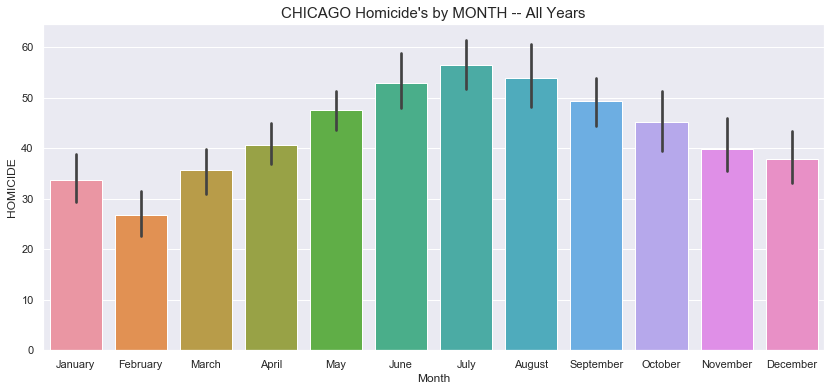

In [80]:
fig, ax = plt.subplots(figsize=(14,6))
months = ['January','February','March','April','May','June','July','August','September','October','November','December']    
fig = sns.barplot(x='Month',
                  y='HOMICIDE',
                  data=so.groupby(['Year','Month'])['Primary Type'].value_counts().unstack().reset_index(),
                  )
ax.set_xticklabels(months)
plt.title("CHICAGO Homicide's by MONTH -- All Years",fontsize=15)

Text(0.5, 1.0, 'CHICAGO ROBBERY RATES by WEEK -- All Years')

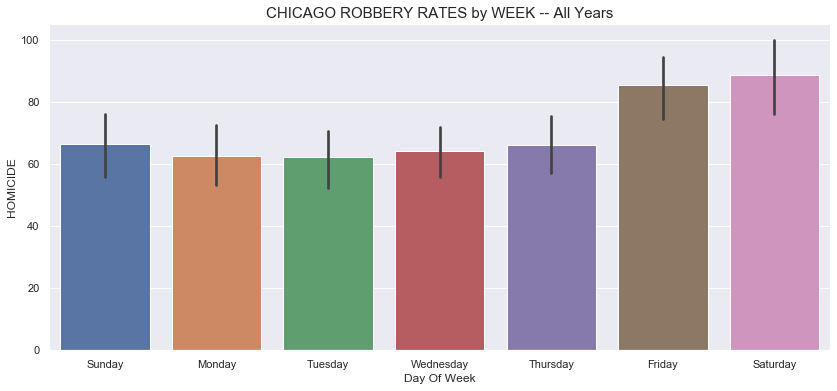

In [94]:
fig, ax = plt.subplots(figsize=(14,6))
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'] 
fig = sns.barplot(x='Day Of Week',
                  y='HOMICIDE',
                  data=so.groupby(['Year','Day Of Week'])['Primary Type'].value_counts().unstack().reset_index(),
                  )
ax.set_xticklabels(days)
plt.title("CHICAGO ROBBERY RATES by WEEK -- All Years",fontsize=15)

*Firday and saturday reports more number of HOMICIDES

---



Text(0.5, 1.0, 'CHICAGO MURDER RATES by Hour of the Day -- All Years')

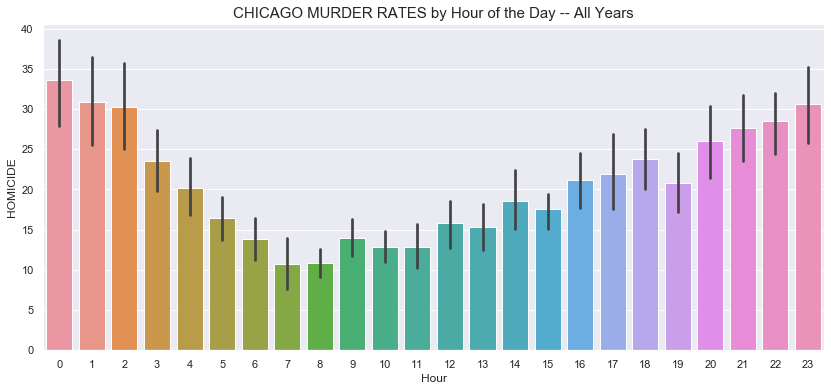

In [28]:
fig, ax = plt.subplots(figsize=(14,6))
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'] 
fig = sns.barplot(x='Hour',
                  y='HOMICIDE',
                  data=so.groupby(['Year','Hour'])['Primary Type'].value_counts().unstack().reset_index(),
                  )
#ax.set_xticklabels(days)
plt.title("CHICAGO MURDER RATES by Hour of the Day -- All Years",fontsize=15)

* Most of the Murders were happening in the night between 5pm to morning 5am
* records very low homicide rate between 7 to 11 am

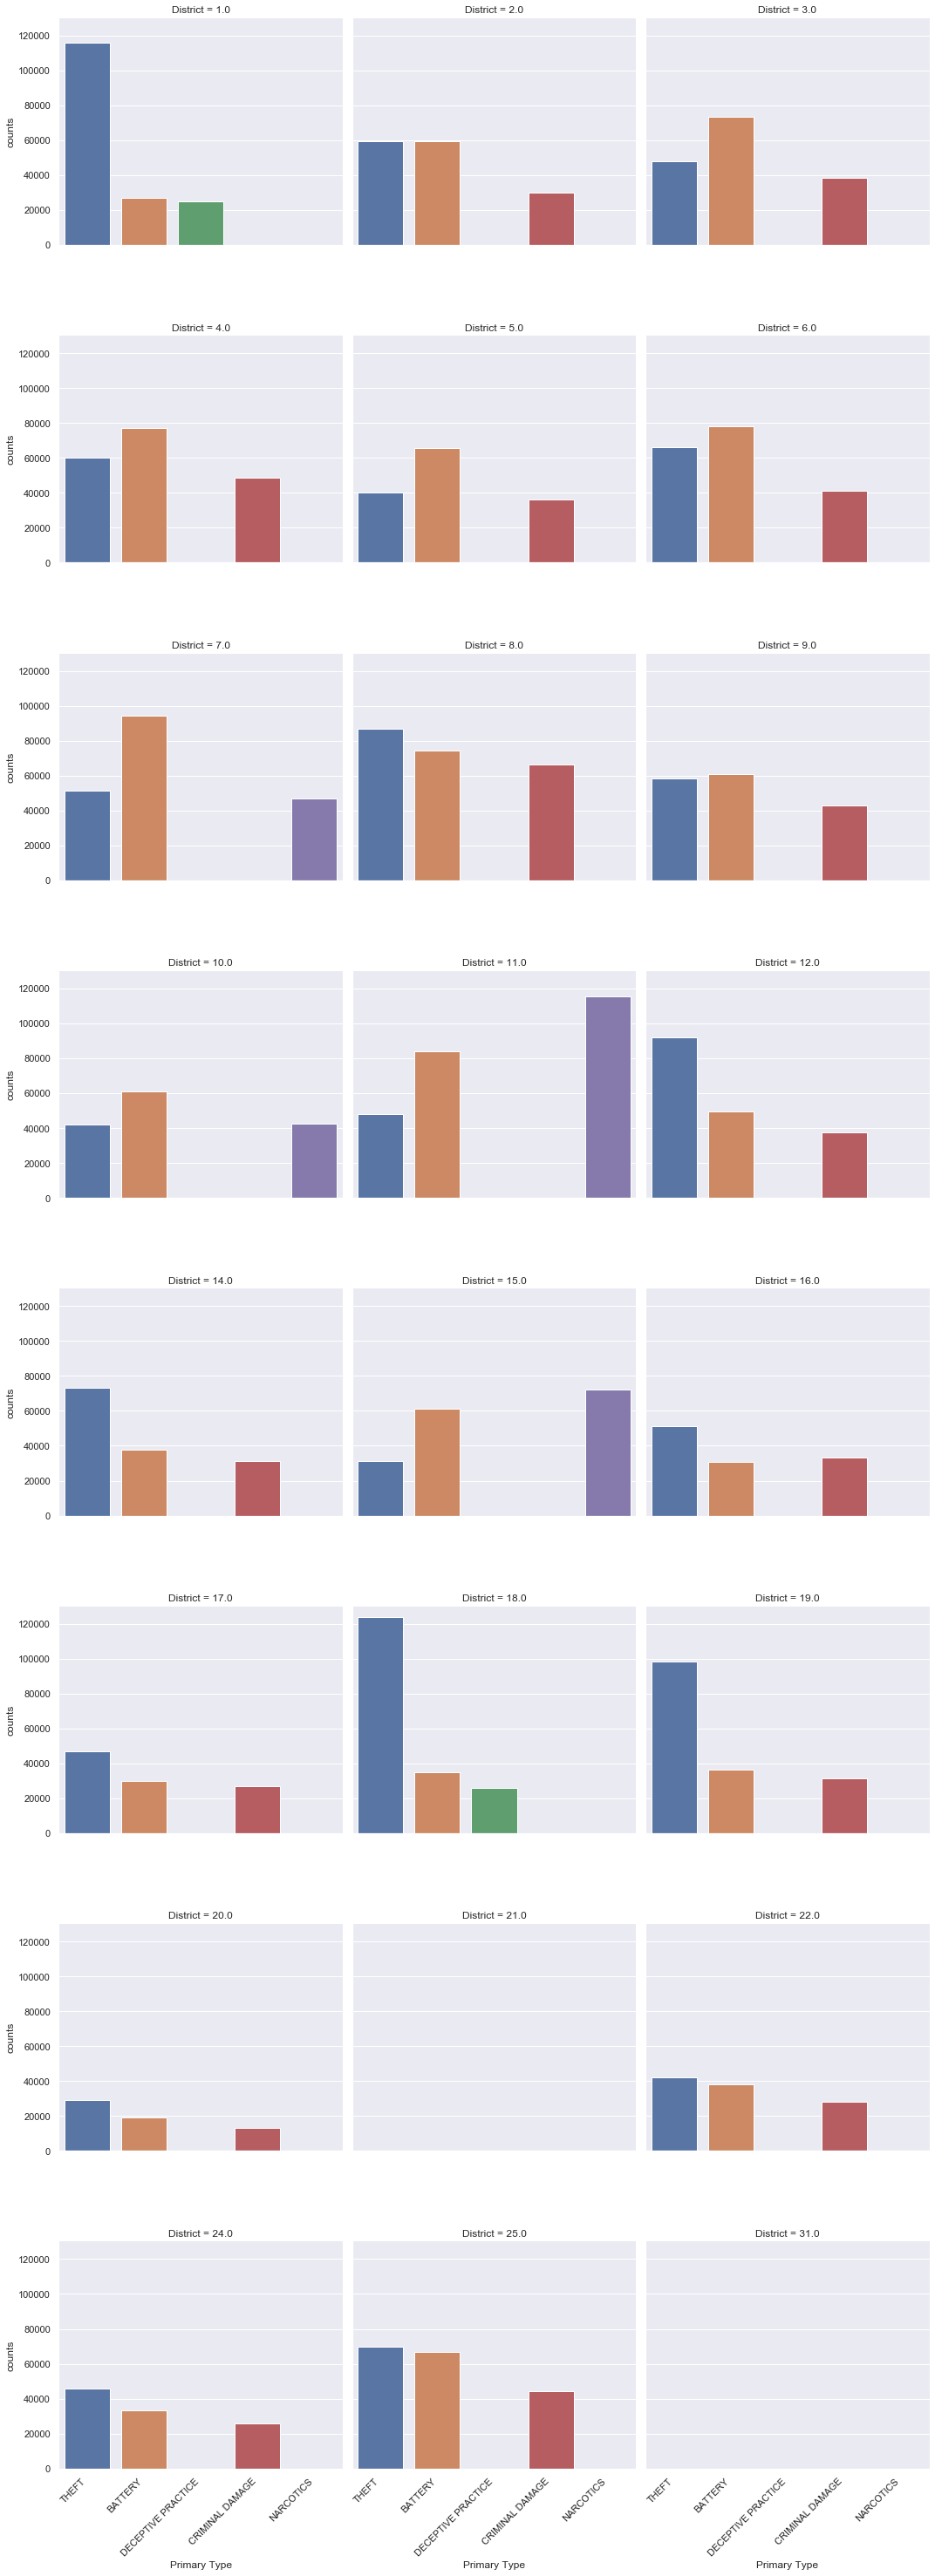

In [95]:
# location attributes = ['Location Description','Beat','District', 'Ward', 'Community Area','X Coordinate','Y Coordinate', 'Latitude', 'Longitude','Location']
%matplotlib inline
top = crimes.groupby(['District', 'Primary Type']).size().reset_index(name='counts').groupby('District').apply(lambda x: x.sort_values('counts',ascending=False).head(3))
#print(topk)

# factor plot to make multiple plots
g =sns.catplot("Primary Type", y='counts', col="District", col_wrap=3,
                   data=top, kind='bar')
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=45, ha='right')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1, 'HOMICIDE vs DISTRICT vs YEAR')

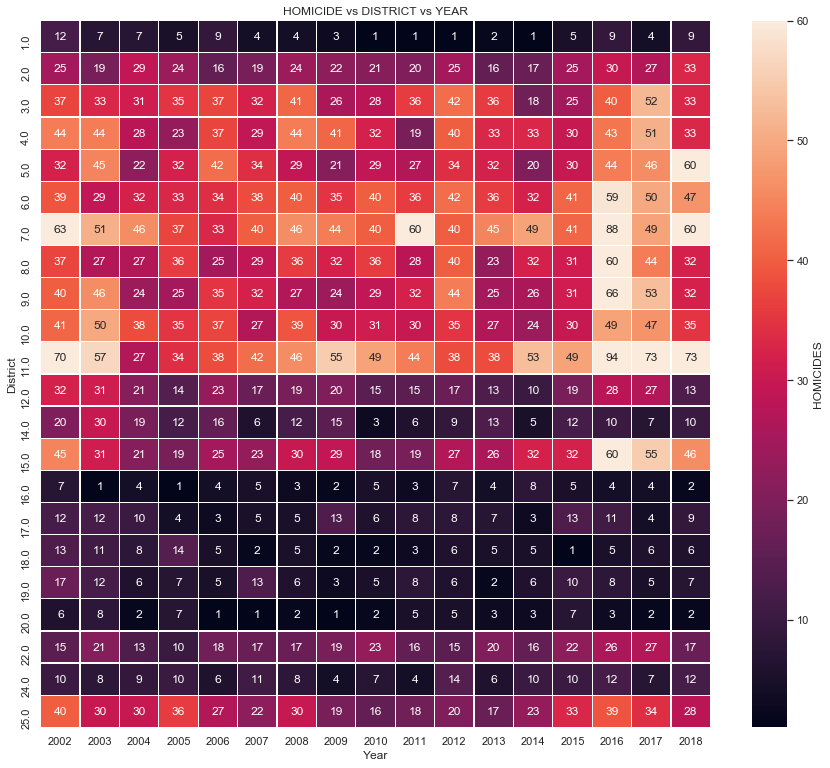

In [31]:
fig, ax = plt.subplots(figsize=(15,13))
corr = so.groupby(['District','Year']).count().Date.unstack()
sns.set(font_scale=1.0)
sns.heatmap(corr.dropna(axis=1),
            annot=True,
           linewidths=0.2,
            robust=True,
           cbar_kws={'label': 'HOMICIDES'})
plt.title('HOMICIDE vs DISTRICT vs YEAR')

Text(0.5, 1.0, 'HOMICIDES PER DISTRICT (2014-2019) - Highest to Lowest')

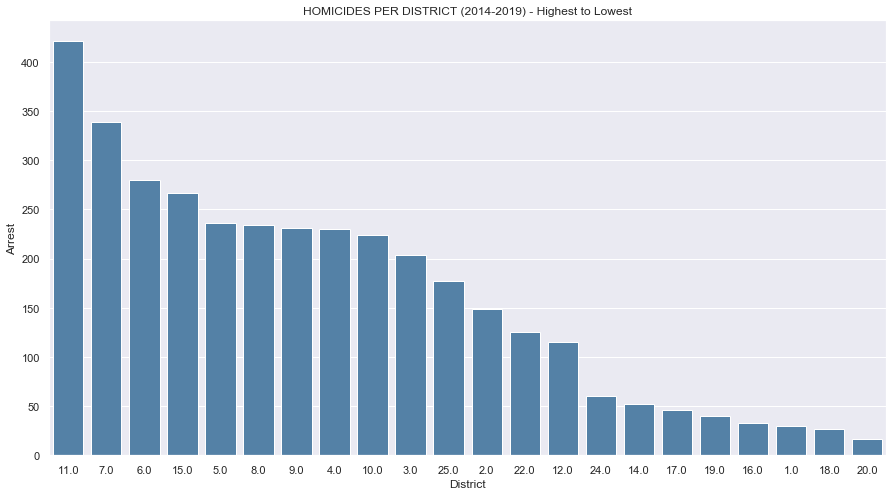

In [32]:
sorted_homicides = so[so['Year']>=2014].groupby(['District']).count().Arrest.reset_index().sort_values('Arrest',ascending=False)
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x='District',
                y='Arrest',
                data=sorted_homicides,
                color='steelblue',
                order = list(sorted_homicides['District']),
                label='big')
plt.title('HOMICIDES PER DISTRICT (2014-2019) - Highest to Lowest')


In [98]:
def toString(x):
    return str(int(x))
crimes_after_2015 = crimes[crimes['Year']>=2016].groupby(['District']).count().Arrest.reset_index()
crimes_after_2015['District'] = crimes_after_2015['District'].apply(toString)

after_2015 = crimes[crimes['Year']>=2016].dropna()

# _____________________________________________

lats = list(after_2015.Latitude)
longs = list(after_2015.Longitude)
locations = [lats,longs]

m = folium.Map(
    location=[np.mean(lats), np.mean(longs)],
    zoom_start=10.3
)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

FastMarkerCluster(data=list(zip(lats, longs))).add_to(m)

m.choropleth(
    geo_data='Boundaries - Police Districts (current).geojson',
    name='choropleth',
    data=crimes_after_2015,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Homicides : 2016-2019',
    highlight=False
    )

# folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map5.html") 
IFrame('map5.html', width=990, height=700)

In [99]:
so_after_2015 = so[so['Year']>=2002].groupby(['District']).count().Arrest.reset_index()
so_after_2015['District'] = so_after_2015['District'].apply(toString)

after_2015 = so[so['Year']>2001].dropna()

# _____________________________________________

lats = list(after_2015.Latitude)
longs = list(after_2015.Longitude)
locations = [lats,longs]

m = folium.Map(
    location=[np.mean(lats), np.mean(longs)],
    zoom_start=10.3
)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

FastMarkerCluster(data=list(zip(lats, longs))).add_to(m)

m.choropleth(
    geo_data='Boundaries - Police Districts (current).geojson',
    name='choropleth',
    data=so_after_2015,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Homicides : 2016-2019',
    highlight=False
    )

# folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map6.html") 
IFrame('map6.html', width=990, height=700)

In [35]:
violent_crimes = ['NARCOTICS', 'HOMICIDE', 'WEAPONS VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION', 'KIDNAPPING', 'BURGLARY']
violent = crimes[crimes['Primary Type'].isin(violent_crimes)]
violent.shape

(1130624, 18)

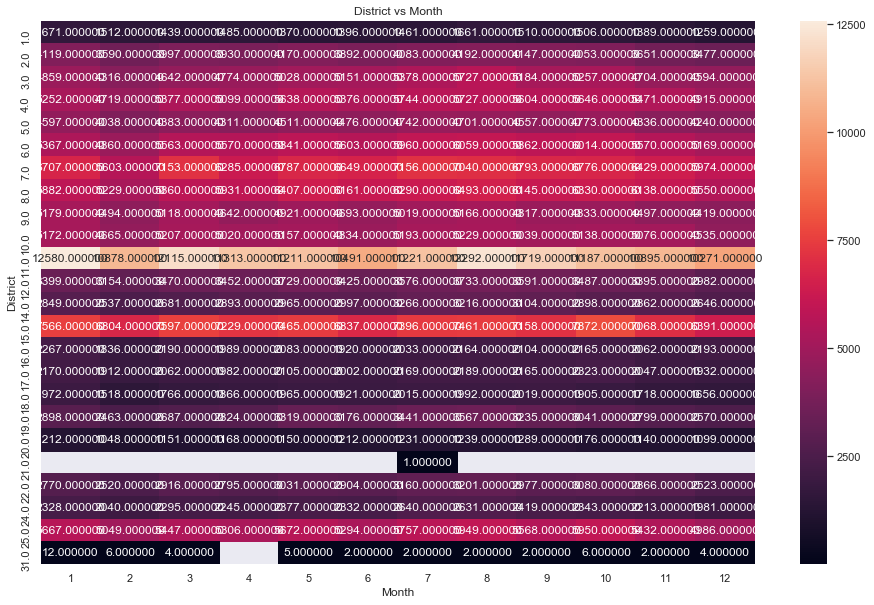

In [42]:
violent_map = violent.groupby(['District','Month'],as_index=False).agg({'Primary Type':"count"})

violent_map = violent_map.pivot("District", "Month", "Primary Type")
plt.figure(figsize = (16,10))
plt.title("District vs Month")
with sns.axes_style("white"):
    sns.heatmap(cri3, mask=violent_map.isnull(), annot=True, fmt="f")